In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [2]:
df = yf.download('AAPL', start='2010-01-01', end='2023-07-15')

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496293,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392175,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800
...,...,...,...,...,...,...
2023-07-10,189.259995,189.990005,187.039993,188.610001,188.610001,59922200
2023-07-11,189.160004,189.300003,186.600006,188.080002,188.080002,46638100
2023-07-12,189.679993,191.699997,188.470001,189.770004,189.770004,60750200


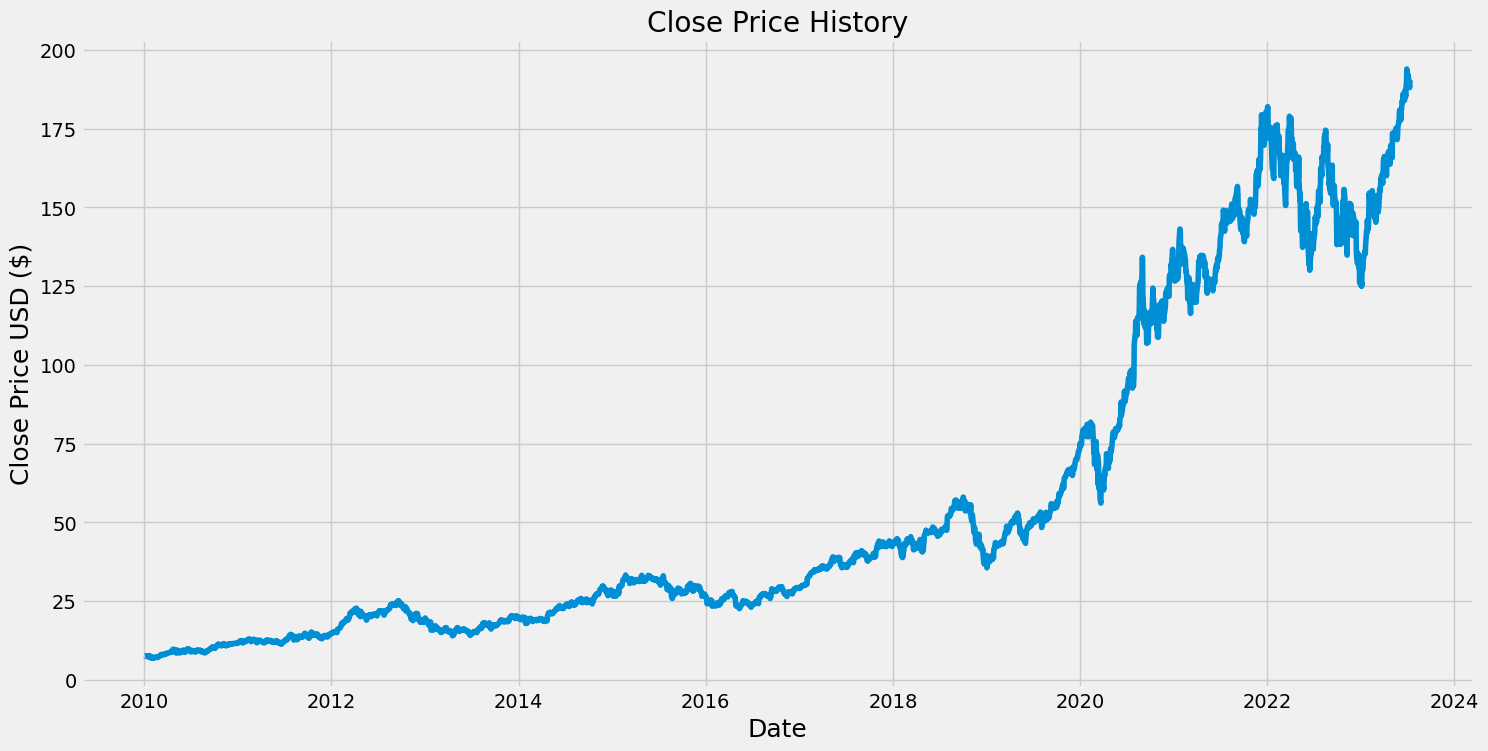

In [5]:
#visualising the price of stock w.r.t to date.
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()



In [7]:
data = df.filter(['Close'])
dataset = data.values #converting to numpy array

training_data_len = math.ceil(len(dataset) * .8)

print(data)

print(dataset)

print(f'The length of training data = {training_data_len}')

data.to_csv('sample_PreProcess_data.csv', index=True)


                 Close
Date                  
2010-01-04    7.643214
2010-01-05    7.656429
2010-01-06    7.534643
2010-01-07    7.520714
2010-01-08    7.570714
...                ...
2023-07-10  188.610001
2023-07-11  188.080002
2023-07-12  189.770004
2023-07-13  190.539993
2023-07-14  190.690002

[3405 rows x 1 columns]
[[  7.64321423]
 [  7.65642881]
 [  7.53464317]
 ...
 [189.77000427]
 [190.53999329]
 [190.69000244]]
The length of training data = 2724


In [16]:
#preprocessing - MinMax Normalization

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00419155],
       [0.00426217],
       [0.0036113 ],
       ...,
       [0.97755346],
       [0.9816686 ],
       [0.98247031]])

In [49]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([4.19154815e-03, 4.26217245e-03, 3.61129894e-03, 3.53685456e-03,
       3.80407654e-03, 3.44715026e-03, 2.99096057e-03, 3.55021592e-03,
       3.31735425e-03, 2.64930186e-03, 4.38814583e-03, 3.75636252e-03,
       3.05776479e-03, 1.08796791e-03, 2.10340786e-03, 2.65121062e-03,
       3.02150335e-03, 1.38191005e-03, 1.90621640e-06, 5.11533681e-04,
       7.27219008e-04, 1.37045746e-03, 0.00000000e+00, 6.50868416e-04,
       3.95101575e-04, 7.90208247e-04, 5.85972960e-04, 1.26356918e-03,
       1.58996287e-03, 2.16639710e-03, 2.00415719e-03, 2.07668515e-03,
       1.83618588e-03, 1.59759538e-03, 9.56265690e-04, 1.64340828e-03,
       1.89917512e-03, 2.39925876e-03, 3.23337370e-03, 3.20665099e-03,
       3.29826406e-03, 3.56166850e-03, 5.13445759e-03, 5.15927153e-03,
       5.91130703e-03, 6.25869203e-03, 6.38466541e-03, 6.59462954e-03,
       6.06782319e-03, 6.18425275e-03, 6.12126606e-03, 6.22242805e-03,
       5.76433469e-03, 6.24151570e-03, 6.93056196e-03, 7.12334466e-03,
     

In [45]:
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2664, 60, 1)

In [19]:
#creating architecture of the model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))




In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
model.fit(x_train, y_train, batch_size=1, epochs=2) #evaluation

Epoch 1/2
2664/2664 [==============================] - 43s 15ms/step - loss: 4.4432e-04
Epoch 2/2
2664/2664 [==============================] - 40s 15ms/step - loss: 1.8638e-04


In [22]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [23]:
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [24]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

22/22 [==============================] - 1s 15ms/step


In [32]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)

rmse

0.4987672422075762

C:\Users\sharm\AppData\Local\Temp\ipykernel_2336\557013566.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


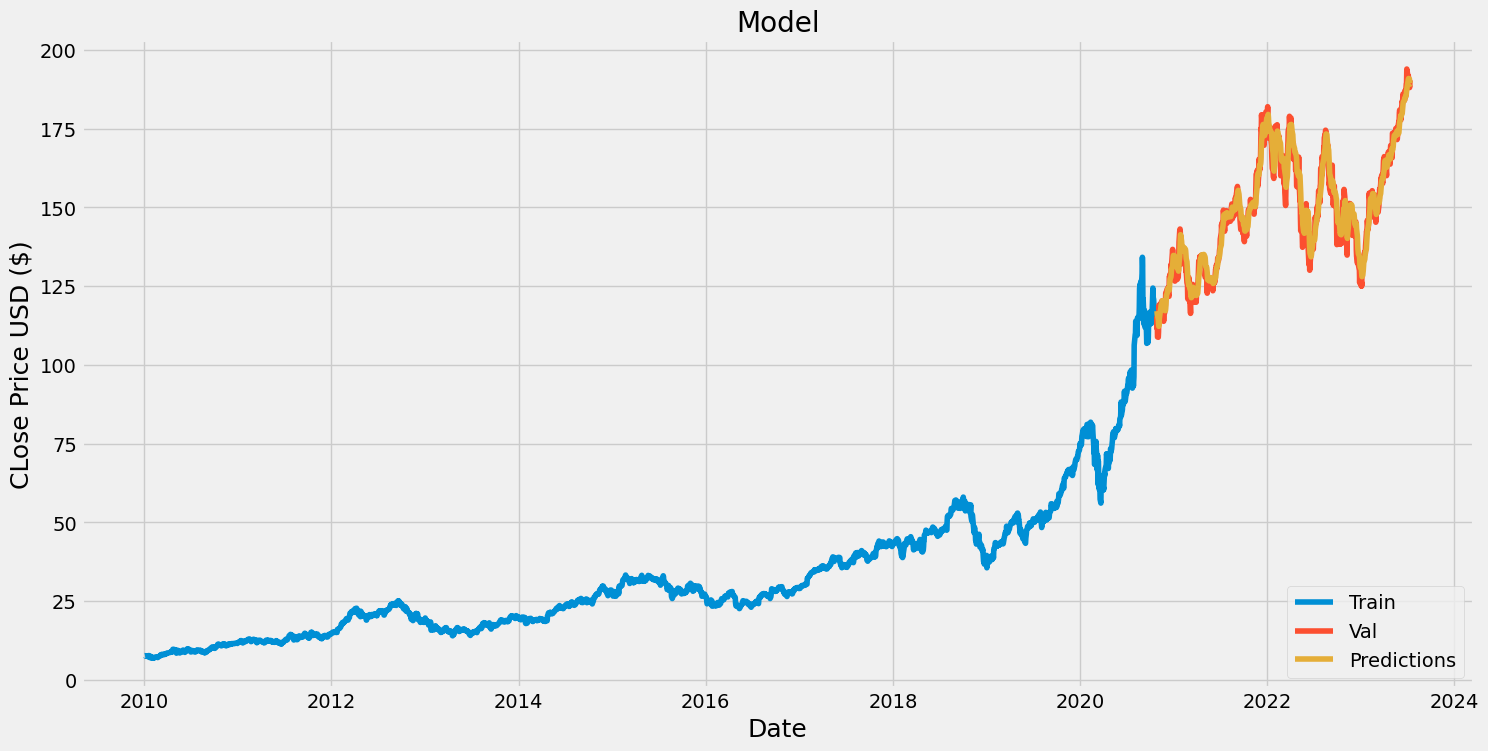

In [26]:
#plotting actual values and the prediction ones.
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('CLose Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [27]:
valid

,Close,Predictions
Date,,
2020-10-28,111.199997,117.085701
2020-10-29,115.320000,116.009712
2020-10-30,108.860001,115.784317
2020-11-02,108.769997,114.419029
2020-11-03,110.440002,113.002304
...,...,...
2023-07-10,188.610001,190.864243
2023-07-11,188.080002,190.199356
2023-07-12,189.770004,189.417740


In [54]:
apple_quote = yf.download('AAPL', start='2012-01-01', end='2023-07-18')

new_df = apple_quote.filter(['Close'])

last_60_days = new_df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []

X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 25ms/step
[[190.48068]]


In [56]:
apple_quote = yf.download('AAPL', start='2023-07-19', end='2023-07-20')

apple_quote

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-19,193.100006,198.229996,192.649994,195.100006,195.100006,80507300


In [ ]:
#model.save("trained_lstm_model.h5")